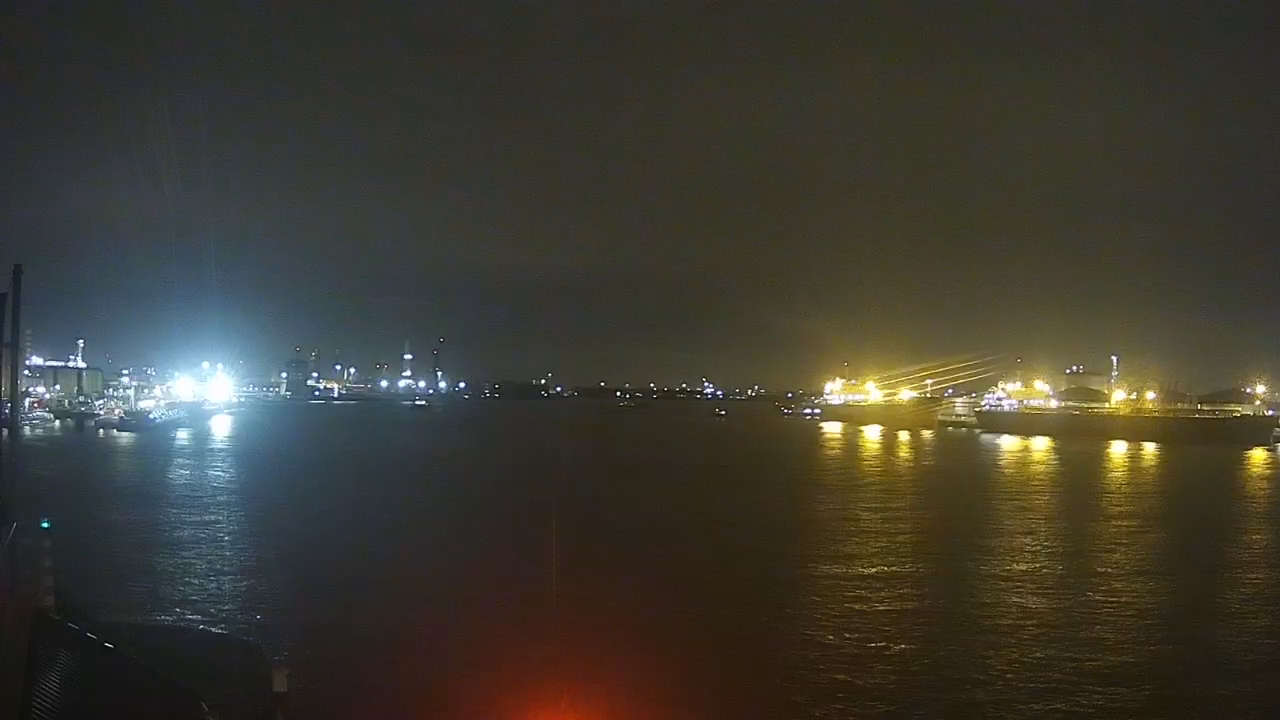

In [7]:
import ffmpeg
import tempfile
from PIL import Image

def get_snapshot(ts_file):
    # Create a temporary file to store the snapshot
    with tempfile.NamedTemporaryFile(suffix='.png') as temp_file:
        # Use ffmpeg to extract the first frame
        (
            ffmpeg
            .input(ts_file)
            .filter('select', 'gte(n,0)')  # Select the first frame
            .output(temp_file.name, vframes=1)
            .overwrite_output()
            .run(capture_stdout=True, capture_stderr=True)
        )
        
        # Open the image using PIL
        image = Image.open(temp_file.name)
        return image

def display_snapshot(image):
    # Display the image
    image.show()


ts_file = 'frames_platjeoost/segment_19550.ts'

# Get and display the snapshot
snapshot = get_snapshot(ts_file)
snapshot

# For example: how to load frames in the last n minutes

In [11]:
import json
from datetime import datetime, timedelta

with open("frames_platjeoost/datedict.json", 'rb') as f:
    datedict = json.load(f)

n = 1 # minutes

def query_time(n):
    images = []
    for key, val in datedict.items():
        if datetime.strptime(datedict[key], "%Y-%m-%d %H:%M:%S") > datetime.now() - timedelta(minutes=n):
            img = get_snapshot(f'frames_platjeoost/{key}.ts')
            images.append(img)
    return images

query_time(n)